In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [144]:
times = np.arange(1000, dtype=np.int32)
start_alt = 1000_000
df = pd.DataFrame({'time': times})
df['gravity'] = 10.0
df['thrust'] = 0.0
df.loc[330:, 'thrust'] = 50.00
df.loc[340:, 'thrust'] = 0.00
df.loc[405:, 'thrust'] = 50.00
df.loc[455:, 'thrust'] = 24.00
df.loc[550:, 'thrust'] = 20.00
df.loc[555:, 'thrust'] = 18.00
df.loc[558:, 'thrust'] = 16.00
df.loc[570:, 'thrust'] = 15.00
df.loc[581:, 'thrust'] = 19.00
df.loc[582:, 'thrust'] = 20.00

df['acceleration'] = df['gravity'] - df['thrust']
df['speed'] = df['acceleration'].cumsum()
df['altitude'] = start_alt - df['speed'].cumsum()

lowest = df[df["altitude"] == df['altitude'].min()]
df.iloc[:lowest.index[-1] + 1].tail(10)

,time,gravity,thrust,acceleration,speed,altitude
573,573,10.0,15.0,-5.0,54.0,248.0
574,574,10.0,15.0,-5.0,49.0,199.0
575,575,10.0,15.0,-5.0,44.0,155.0
576,576,10.0,15.0,-5.0,39.0,116.0
577,577,10.0,15.0,-5.0,34.0,82.0
578,578,10.0,15.0,-5.0,29.0,53.0
579,579,10.0,15.0,-5.0,24.0,29.0
580,580,10.0,15.0,-5.0,19.0,10.0
581,581,10.0,19.0,-9.0,10.0,0.0
582,582,10.0,20.0,-10.0,0.0,0.0


In [145]:
lowest = df[df["altitude"] == df['altitude'].min()].iloc[-1]
if lowest['altitude'] == 0 and lowest['speed'] == 0:
    print("landing successful!")

landing successful!


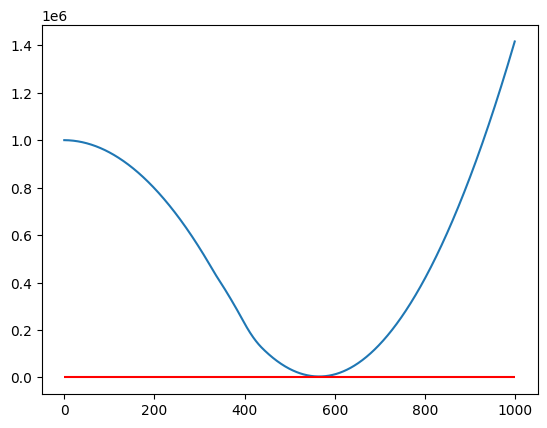

In [114]:
df['altitude'].plot()
plt.hlines(xmin=0, xmax=1000, y=0.0, color="red")

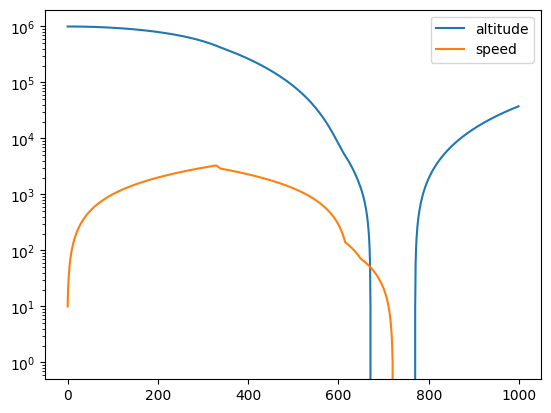

In [100]:
ax = df[['altitude', 'speed']].plot()
ax.set_yscale('log')

In [101]:
df.drop('time', axis=1, inplace=True)

In [102]:
df

,gravity,thrust,acceleration,speed,altitude
0,10.0,0.0,10.0,10.0,999990.0
1,10.0,0.0,10.0,20.0,999970.0
2,10.0,0.0,10.0,30.0,999940.0
3,10.0,0.0,10.0,40.0,999900.0
4,10.0,0.0,10.0,50.0,999850.0
...,...,...,...,...,...
995,10.0,11.0,-1.0,-274.0,36459.0
996,10.0,11.0,-1.0,-275.0,36734.0
997,10.0,11.0,-1.0,-276.0,37010.0
998,10.0,11.0,-1.0,-277.0,37287.0
